<a href="https://colab.research.google.com/github/arshita-07/insurance-price-prediction/blob/main/insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
import io  
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [4]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["smoker"]=map_smoking(df["smoker"])

In [7]:
def map_region(column):
    mapped=[]
    
    for row in column:
        
        if row=="southwest":
            mapped.append(1)
        elif row =="southeast":
            mapped.append(2)
        elif row=="northwest":
            mapped.append(3)
        else:
            mapped.append(4)
        
        
    return mapped
df["region"]=map_region(df["region"])

In [8]:
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="female":
            mapped.append(1)
        else:
            mapped.append(0)
        
        
    return mapped
df["sex"]=map_smoking(df["sex"])

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [10]:
def calc_mean(x):
  return x.mean().to_numpy()

mean_features = calc_mean(df[["age","bmi","children"]]) 
print(mean_features)
mean_target = calc_mean(df[["charges"]]) 
print(mean_target)


[39.20702541 30.66339686  1.09491779]
[13270.42226514]


In [11]:
def calc_sd(x):
  return x.std().to_numpy()

sd_features = calc_mean(df[["age","bmi","children"]]) 
print(sd_features)
sd_target = calc_mean(df[["charges"]]) 
print(sd_target)

[39.20702541 30.66339686  1.09491779]
[13270.42226514]


In [12]:
def normalise(df, mean_features,sd_features):
  list = [["age","bmi","children"]]
  for i in list:
    df[i] = (df[i]-mean_features[list.index(i)])/sd_features[list.index(i)]
  return df

df = normalise(df, mean_features,sd_features)
df
  

,age,sex,bmi,children,smoker,region,charges
0,-0.515393,1,-0.288393,-1.000000,1,1,16884.92400
1,-0.540899,0,-0.138675,-0.974494,0,2,1725.55230
2,-0.285842,0,-0.158314,-0.923483,0,2,4449.46200
3,-0.158314,0,-0.420895,-1.000000,0,3,21984.47061
4,-0.183820,0,-0.263397,-1.000000,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,0.275282,0,-0.210091,-0.923483,0,3,10600.54830
1334,-0.540899,1,-0.185860,-1.000000,0,4,2205.98080
1335,-0.540899,1,-0.060117,-1.000000,0,2,1629.83350
1336,-0.464382,1,-0.341955,-1.000000,0,1,2007.94500


In [13]:
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

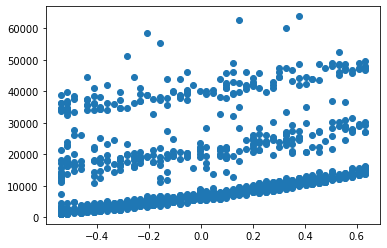

In [14]:
plt.scatter(df["age"],df["charges"])


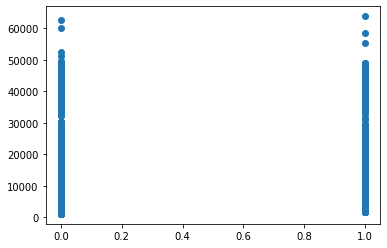

In [15]:
plt.scatter(df["sex"],df["charges"])


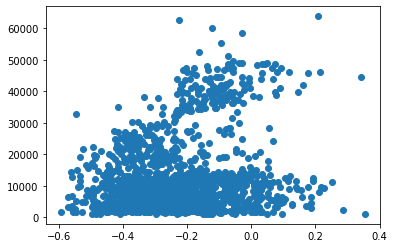

In [16]:
plt.scatter(df["bmi"],df["charges"])


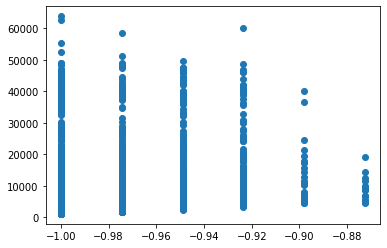

In [17]:
plt.scatter(df["children"],df["charges"])


plt.scatter(df["smoker"],df["charges"])


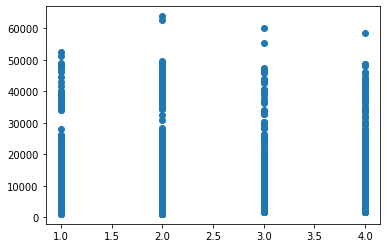

In [18]:
plt.scatter(df["region"],df["charges"])

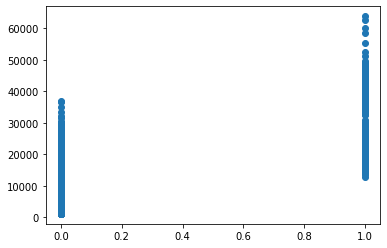

In [19]:
plt.scatter(df["smoker"],df["charges"])

In [20]:
x0 = np.ones((1338,1))
x0

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [21]:
x= df[["age","sex","bmi","children","smoker","region"]].to_numpy()
x = np.hstack((x0,x))
x

array([[ 1.        , -0.51539297,  1.        , ..., -1.        ,
         1.        ,  1.        ],
       [ 1.        , -0.54089861,  0.        , ..., -0.97449437,
         0.        ,  2.        ],
       [ 1.        , -0.28584228,  0.        , ..., -0.9234831 ,
         0.        ,  2.        ],
       ...,
       [ 1.        , -0.54089861,  1.        , ..., -1.        ,
         0.        ,  2.        ],
       [ 1.        , -0.46438171,  1.        , ..., -1.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.55584361,  1.        , ..., -1.        ,
         1.        ,  3.        ]])

In [22]:
y = df["charges"].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [23]:
theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)
theta

array([28560.11074163, 10087.50008892,   131.11057962, 13039.08562578,
       18794.64799401, 23820.43412267,   353.64001656])

In [24]:
def pred_price(age, sex, bmi, children, smoker, region):
  age = (age-mean_features[0])/sd_features[0]
  bmi = (bmi-mean_features[1])/sd_features[1]
  children = (children-mean_features[2])/sd_features[2]
  if sex=="female":
    s=1
  else:
    s=0
  if region=="southwest":
    r=1
  elif region =="southeast":
    r=2
  elif region=="northwest":
    r=3
  else:
    r=4
  if smoker=="yes":
    smoker_val = 1
  else:
    smoker_val=0
  
  inputs = np.array([1,age, s, bmi, children, smoker_val, r])
  return np.matmul(inputs, theta)


In [25]:
pred_price(19,"female",31.92,1,"yes","northeast")

47632.24072927215

LinearRegression inbuilt sklearn model

In [32]:
x= df[["age","bmi","smoker"]].to_numpy()

In [33]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [34]:
intercepts=[]
coefs=[]
intercepts.append(reg.intercept_)
coefs.append(reg.coef_)

In [35]:
print(intercepts)
print(coefs)

[11148.03438189395]
[array([10176.08509665, 12648.77971043, 23823.68449531])]


In [39]:
def transform_input(age,bmi,smoker):
  age = (age-mean_features[0])/sd_features[0]
  bmi = (bmi-mean_features[1])/sd_features[1]
  if smoker=="yes":
    smoker_val = 1
  else:
    smoker_val=0
  
  inputs = np.array([age,bmi,smoker])
  return inputs


In [46]:
reg.predict([transform_input(19,24,1)])

array([26978.35698968])

In [42]:
print(reg.score(x, y))

0.7474771588119513
